### Fish Marktet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#loading the data
path = r"C:\Users\bbuser\Downloads\Fish.csv"
df = pd.read_csv(path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### data exploring

In [4]:
#ve explore data 
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

### feature engineering

In [8]:
df['Species'].value_counts()
le = LabelEncoder()
# Fit the encoder on the original string labels
le.fit(pd.read_csv(path)['Species'])
df['Species'] = le.transform(pd.read_csv(path)['Species'])
fish = np.array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'])
fish_encoded = le.transform(fish.tolist())
print("Original:", fish)
print("Encoded:", fish_encoded)
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Original: ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Encoded: [0 4 6 1 2 3 5]
Mapping: {'Bream': np.int64(0), 'Parkki': np.int64(1), 'Perch': np.int64(2), 'Pike': np.int64(3), 'Roach': np.int64(4), 'Smelt': np.int64(5), 'Whitefish': np.int64(6)}


In [9]:
#feature engineering
X = df.drop(columns=['Weight'])
y = df['Weight']
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
#ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R^2 Score:", r2_score(y_test, y_pred_ridge))


Linear Regression
Mean Squared Error: 13727.816553006549
R^2 Score: 0.9034878699241471

Ridge Regression
Mean Squared Error: 13743.57617789365
R^2 Score: 0.9033770733556485


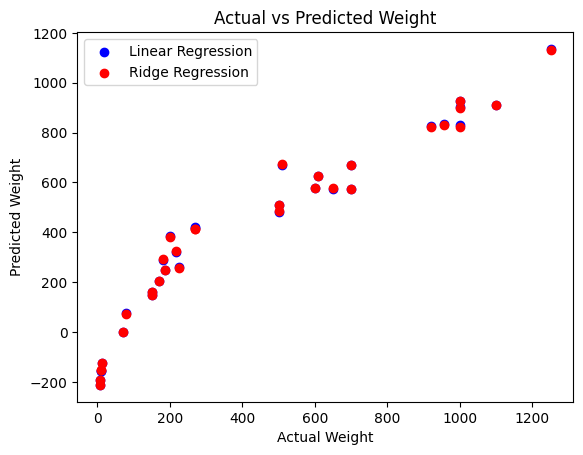

In [10]:
#plotting
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.legend()
plt.show()


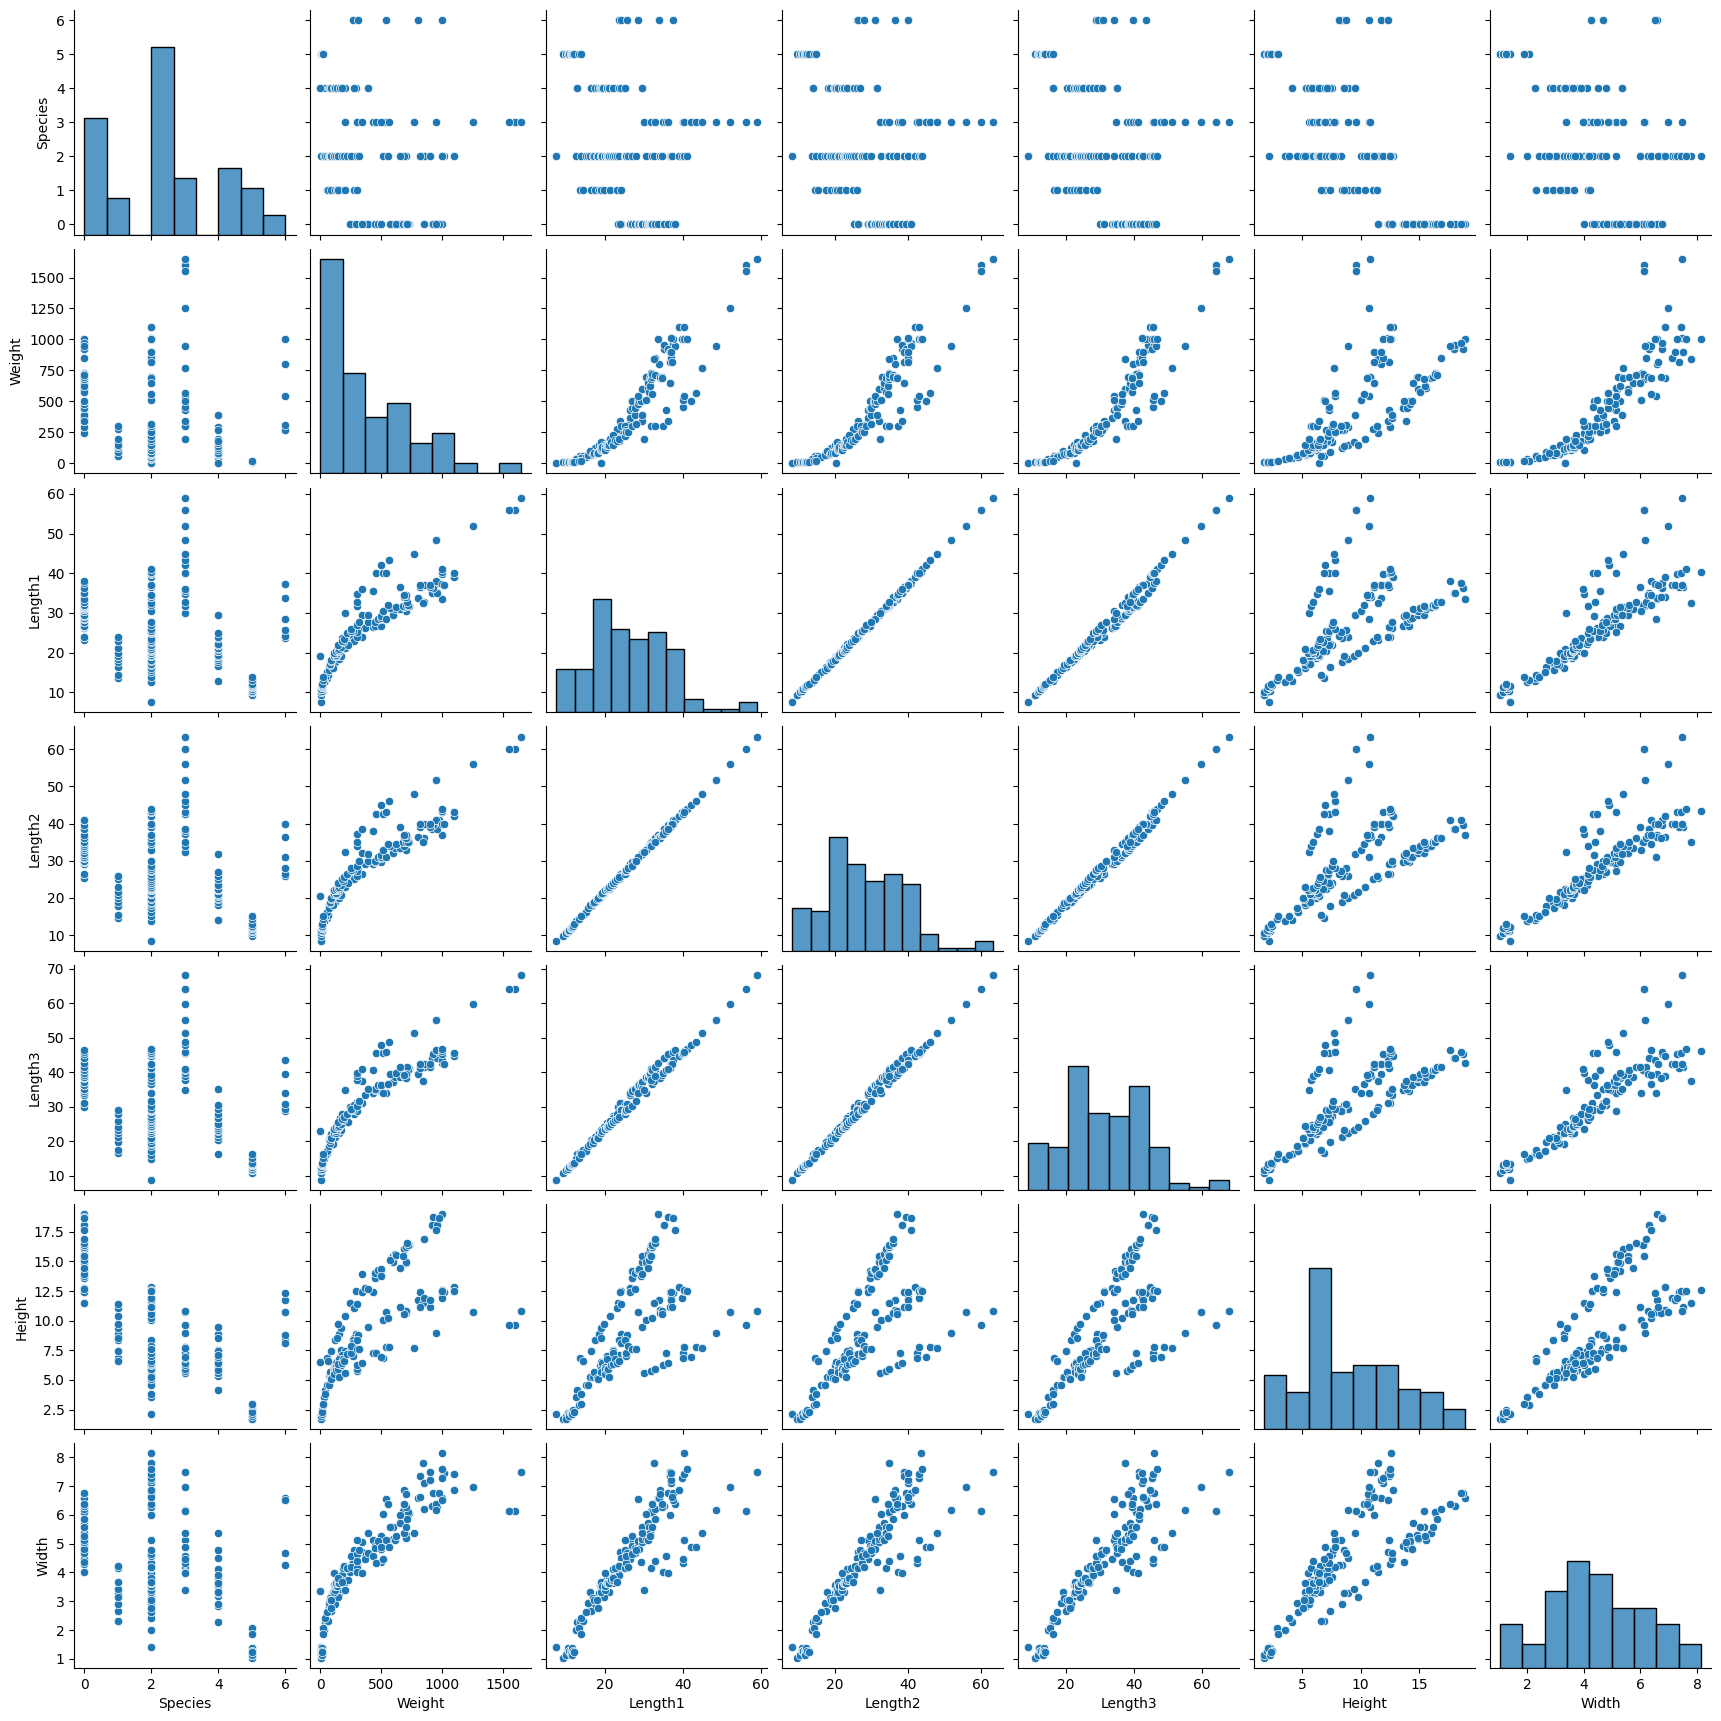

In [11]:
#scatter plot
sns.pairplot(df)
plt.show()

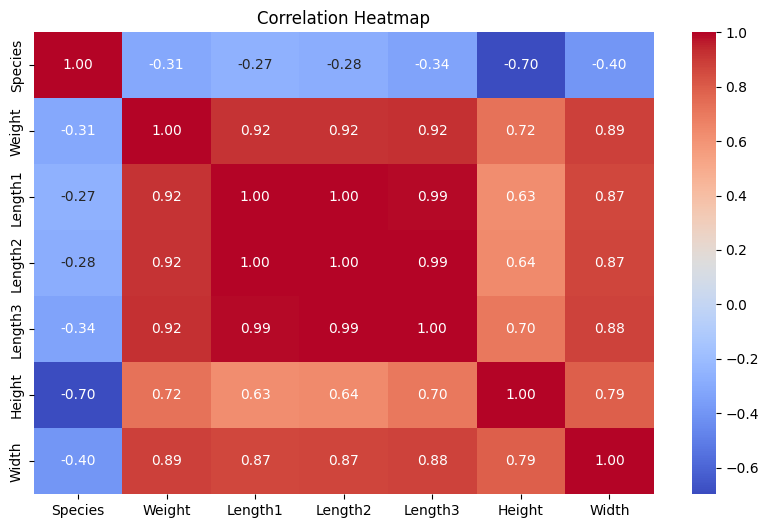

In [12]:
#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#outliers detection and removal
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
#model develpment and comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),   
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Mean Squared Error': mse, 'R^2 Score': r2}
results_df = pd.DataFrame(results).T
print(results_df)

                                  Mean Squared Error  R^2 Score
Linear Regression                       13727.816553   0.903488
Ridge Regression                        13743.576178   0.903377
Lasso Regression                        13527.663022   0.904895
Polynomial Regression (Degree 2)         3808.718972   0.973223


c:\Users\bbuser\Desktop\DataSience-brain-bytes\DataScience-Brain-Bytes\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.372e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(
